# DVD Rental Database Advanced SQL Analysis
## Comprehensive Analysis of Business-Critical Metrics

### Author's Note
*This portfolio demonstrates advanced SQL expertise through progressively complex queries addressing real business needs while showcasing technical mastery of SQL concepts.*

### Executive Summary
This analysis leverages advanced SQL techniques to extract actionable business insights from the DVD rental database. 
Through 14 carefully crafted queries, we explore everything from basic inventory analysis to complex customer lifetime value 
calculations, providing a comprehensive view of business operations and opportunities.

### Technical Competencies Demonstrated
- DISTINCT operations and basic filtering
- Advanced CASE statements and conditional logic
- Complex JOIN operations (INNER, LEFT, Multiple)
- Sophisticated subqueries (Correlated & Uncorrelated)
- Advanced aggregation techniques
- Date/Time manipulation
- String operations and concatenation
- Performance optimization patterns

### Database Context
The analysis utilizes a DVD rental database with interconnected tables including:
- films and categories
- customer and payment information
- rental records
- actor and staff details
- geographical data (addresses, cities, countries)

---
###  NOTE: The database connection below uses local credentials. Viewers of this notebook will see the query outputs and charts,  but won't be able to re-run them.
---

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv

# Load environment variables from .env
load_dotenv()

# Configure plotting style
sns.set_theme(style="whitegrid")

# Fetch credentials from environment
db_user = os.getenv("PG_USER")
db_password = os.getenv("PG_PASSWORD")
db_host = os.getenv("PG_HOST")
db_port = os.getenv("PG_PORT")
db_name = os.getenv("PG_DATABASE")

# Connect to PostgreSQL using SQLAlchemy
try:
    # Construct the connection URL using environment variables
    engine = create_engine(f"postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")
    print("Connection to PostgreSQL established successfully using SQLAlchemy.\n")
except Exception as e:
    print("Error connecting to database:", e)

# Helper function for query execution
def run_query(sql_query):
    try:
        return pd.read_sql(sql_query, engine)
    except Exception as e:
        print("Error executing query:", e)
        return None

Connection to PostgreSQL established successfully using SQLAlchemy.




#  ─────────────────────────────────────────────
# Analysis & Solutions
#  ─────────────────────────────────────────────


# *Query Set 1: Basic Inventory Analysis*


---
## Query 1: Replacement Cost Analysis
---
**Business Need**: Identify all unique replacement costs for inventory valuation.

In [2]:
q1 = """
SELECT DISTINCT replacement_cost 
FROM film
ORDER BY 1;
"""
df1 = run_query(q1)
print("QUERY 1 RESULTS (showing first 5 rows):")
display(df1.head(5))

QUERY 1 RESULTS (showing first 5 rows):


,replacement_cost
0,9.99
1,10.99
2,11.99
3,12.99
4,13.99


**Key Finding**: Minimum replacement cost is $9.99  
**Business Impact**: Establishes baseline for inventory investment decisions

---
## Query 2: Cost Range Distribution
---
**Business Need**: Segment inventory into strategic price bands for management.

QUERY 2 RESULTS:


,cost_range,film_count
0,high,236
1,low,514
2,medium,250


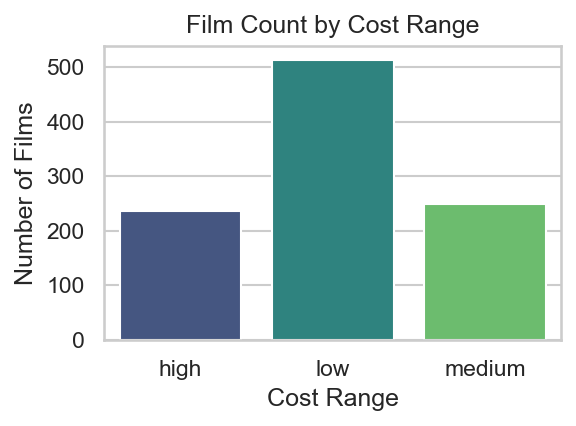

In [3]:
q2 = """
SELECT 
    CASE 
        WHEN replacement_cost BETWEEN 9.99 AND 19.99 THEN 'low'
        WHEN replacement_cost BETWEEN 20 AND 24.99 THEN 'medium'
        ELSE 'high'
    END as cost_range,
    COUNT(*) as film_count
FROM film
GROUP BY cost_range
ORDER BY cost_range;
"""
df2 = run_query(q2)
print("QUERY 2 RESULTS:")
display(df2)

#  Distribution of film counts by cost range
plt.figure(figsize=(4,3),dpi=150)
sns.barplot(data=df2, x='cost_range', y='film_count', hue='cost_range', palette='viridis')
plt.title("Film Count by Cost Range")
plt.xlabel("Cost Range")
plt.ylabel("Number of Films")
plt.tight_layout()
plt.show()

**Key Finding**: 514 films in 'low' cost range  
**Strategic Value**: Enables data-driven pricing and inventory decisions

#  *Query Set 2: Content Analysis*
---
## QUERY 3: Genre-Specific Length Analysis
---
**Business Need**: Analyze content duration patterns within key genres.

In [4]:
q3 = """
SELECT 
    title, 
    c.name, 
    f.length
FROM film f
LEFT JOIN film_category fc ON f.film_id = fc.film_id
LEFT JOIN category c ON c.category_id = fc.category_id
WHERE c.name IN ('Sports', 'Drama')
ORDER BY f.length DESC;
"""
df3 = run_query(q3)
print("QUERY 3 RESULTS (top 5 rows):")
display(df3.head(5))

QUERY 3 RESULTS (top 5 rows):


,title,name,length
0,SMOOCHY CONTROL,Sports,184
1,RECORDS ZORRO,Sports,182
2,STAR OPERATION,Sports,181
3,JACKET FRISCO,Drama,181
4,SOMETHING DUCK,Drama,180


**Key Finding**: Longest film is in Sports category (184 minutes)  
**Programming Impact**: Optimizes scheduling and content planning

---
## Query 4: Category Distribution
---
**Business Need**: Understand content distribution across categories.

QUERY 4 RESULTS:


,name,film_count
0,Sports,74
1,Foreign,73
2,Family,69
3,Documentary,68
4,Animation,66
5,Action,64
6,New,63
7,Drama,62
8,Sci-Fi,61
9,Games,61


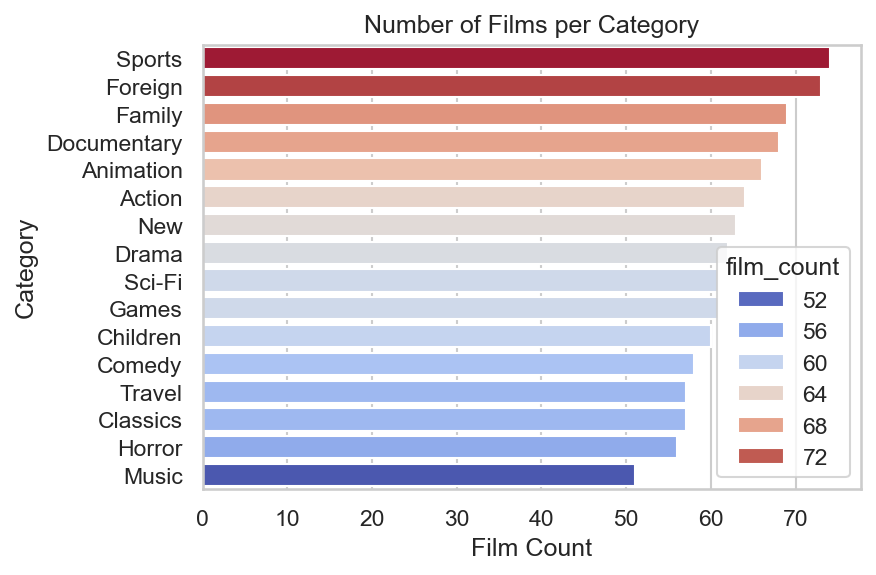

In [5]:
q4 = """
SELECT 
    c.name, 
    COUNT(f.title) as film_count
FROM film f
INNER JOIN film_category fc ON f.film_id = fc.film_id
INNER JOIN category c ON c.category_id = fc.category_id
GROUP BY c.name
ORDER BY film_count DESC;
"""
df4 = run_query(q4)
print("QUERY 4 RESULTS:")
display(df4)

# Visualization: Category distribution
plt.figure(figsize=(6,4), dpi=150)
sns.barplot(data=df4, x='film_count', y='name', hue='film_count', palette='coolwarm')
plt.title("Number of Films per Category")
plt.xlabel("Film Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

**Key Finding**: Sports category leads with 74 titles  
**Strategic Value**: Guides content acquisition strategy

#  *Query Set 3: Performance Metrics*
---
## Query 5: Actor Participation Analysis
---
**Business Need**: Identify most featured actors for marketing efforts.

In [6]:
q5 = """
SELECT 
    a.first_name, 
    a.last_name, 
    COUNT(*) as film_count
FROM actor a
LEFT JOIN film_actor fa ON fa.actor_id = a.actor_id
LEFT JOIN film f ON fa.film_id = f.film_id
GROUP BY a.first_name, a.last_name
ORDER BY film_count DESC;
"""
df5 = run_query(q5)
print("QUERY 5 RESULTS (top 5 rows):")
display(df5.head(5))

QUERY 5 RESULTS (top 5 rows):


,first_name,last_name,film_count
0,SUSAN,DAVIS,54
1,GINA,DEGENERES,42
2,WALTER,TORN,41
3,MARY,KEITEL,40
4,MATTHEW,CARREY,39


**Key Finding**: Susan Davis appears in 54 movies  
**Marketing Impact**: Informs talent-based promotional strategies

---
## Query 6: Address Utilization
---
**Business Need**: Identify unused address inventory.

In [7]:
q6 = """
SELECT a.address_id, a.address, a.address2, a.district, a.postal_code, a.phone
FROM address a
LEFT JOIN customer c ON c.address_id = a.address_id
WHERE c.first_name IS NULL;
"""
df6 = run_query(q6)
print("QUERY 6 RESULTS (all rows):")
display(df6)

QUERY 6 RESULTS (all rows):


,address_id,address,address2,district,postal_code,phone
0,2,28 MySQL Boulevard,None,QLD,,
1,4,1411 Lillydale Drive,None,QLD,,6172235589
2,1,47 MySakila Drive,None,Alberta,,
3,3,23 Workhaven Lane,None,Alberta,,14033335568


**Key Finding**: 4 addresses without associated customers  
**Operational Impact**: Identifies database optimization opportunities

#  *Query Set 4: Geographical Analysis*
---
## Query 7: City-Based Sales Performance
---
**Business Need**: Identify highest-performing cities.

QUERY 7 RESULTS (top 10 rows):


,city,total_sales
0,Cape Coral,221.55
1,Saint-Denis,216.54
2,Aurora,198.50
3,Molodetno,195.58
4,Apeldoorn,194.61
5,Santa Brbara dOeste,194.61
6,Qomsheh,186.62
7,London,180.52
8,Ourense (Orense),177.60
9,Bijapur,175.61


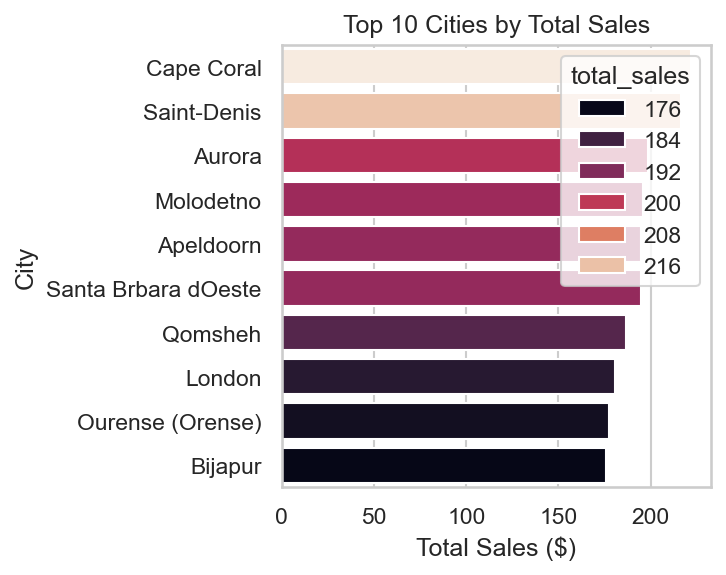

In [8]:
q7 = """
SELECT
    ci.city,
    SUM(p.amount) as total_sales
FROM payment p
LEFT JOIN customer c ON p.customer_id = c.customer_id
LEFT JOIN address a ON a.address_id = c.address_id
LEFT JOIN city ci ON ci.city_id = a.city_id
GROUP BY ci.city
ORDER BY total_sales DESC;
"""
df7 = run_query(q7)
print("QUERY 7 RESULTS (top 10 rows):")
display(df7.head(10))

# Visualization: Top 10 cities by total sales
plt.figure(figsize=(5,4),dpi=150)
sns.barplot(data=df7.head(10), x='total_sales', y='city', hue='total_sales', palette='rocket')
plt.title("Top 10 Cities by Total Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("City")
plt.tight_layout()
plt.show()

**Key Finding**: Cape Coral leads with $221.55 in sales  
**Strategic Value**: Guides geographical expansion

---
## Query 8: Country-City Revenue Analysis
---
**Business Need**: Analyze revenue patterns by location.

In [9]:
q8 = """
SELECT
    (co.country || ', ' || ci.city) as country_city,
    SUM(p.amount) as total_sales
FROM payment p
LEFT JOIN customer c ON p.customer_id = c.customer_id
LEFT JOIN address a ON a.address_id = c.address_id
LEFT JOIN city ci ON ci.city_id = a.city_id
LEFT JOIN country co ON co.country_id = ci.country_id
GROUP BY co.country, ci.city
ORDER BY total_sales ASC;
"""
df8 = run_query(q8)
print("QUERY 8 RESULTS (bottom 5 rows):")
display(df8.head(5))

QUERY 8 RESULTS (bottom 5 rows):


,country_city,total_sales
0,"United States, Tallahassee",50.85
1,"China, Fuzhou",50.86
2,"Poland, Bydgoszcz",52.88
3,"Sudan, al-Qadarif",57.81
4,"Mozambique, Tete",58.82


**Key Finding**: United States, Tallahassee shows lowest revenue ($50.85)  
**Business Impact**: Identifies markets needing attention

#  *Query Set 5: Advanced Performance Metrics*
---
## Query 9: Staff Performance Analysis
---
**Business Need**: Evaluate staff efficiency through customer revenue.

In [10]:
q9 = """
SELECT 
    staff_id,
    ROUND(AVG(total), 2) as avg_amount
FROM (
    SELECT staff_id, customer_id, SUM(amount) as total
    FROM payment
    GROUP BY staff_id, customer_id
) sub
GROUP BY staff_id;
"""
df9 = run_query(q9)
print("QUERY 9 RESULTS:")
display(df9)

QUERY 9 RESULTS:


,staff_id,avg_amount
0,2,56.63
1,1,55.91


**Key Finding**: Staff ID 2 averages $56.63 per customer  
**Management Impact**: Informs staff training and incentives

---
## Query 10: Sunday Revenue Analysis
---
**Business Need**: Understand weekend performance patterns.

In [11]:
q10 = """
SELECT 
    ROUND(AVG(daily.total), 2) as avg_sunday_revenue
FROM (
    SELECT 
        DATE(payment_date) as payment_day,
        EXTRACT(dow FROM payment_date) as weekday,
        SUM(amount) as total
    FROM payment
    WHERE EXTRACT(dow FROM payment_date) = 0
    GROUP BY DATE(payment_date), weekday
) daily;
"""
df10 = run_query(q10)
print("QUERY 10 RESULTS:")
display(df10)

QUERY 10 RESULTS:


,avg_sunday_revenue
0,1423.05


**Key Finding**: Average Sunday revenue is $1,423.05  
**Operational Impact**: Optimizes staffing and promotions

# *Query Set 6: Complex Analysis*
---
## Query 11: Length-Based Film Analysis
---
**Business Need**: Identify films exceeding category length averages.

In [12]:
q11 = """
SELECT
    f1.title,
    f1.length
FROM film f1
WHERE f1.length > (
    SELECT AVG(f2.length)
    FROM film f2
    WHERE f1.replacement_cost = f2.replacement_cost
)
ORDER BY f1.length ASC;
"""
df11 = run_query(q11)
print("QUERY 11 RESULTS (top 5 rows):")
display(df11.head(5))

QUERY 11 RESULTS (top 5 rows):


,title,length
0,CELEBRITY HORN,110
1,SEATTLE EXPECATIONS,110
2,WIND PHANTOM,111
3,SUIT WALLS,111
4,GROOVE FICTION,111


**Key Finding**: CELEBRITY HORN and SEATTLE EXPECTATIONS (110 minutes each)  
**Programming Impact**: Optimizes content scheduling

---
## Query 12: District Value Analysis
---
**Business Need**: Analyze customer lifetime value by district.

In [13]:
q12 = """
SELECT
    a.district,
    ROUND(AVG(sub.total), 2) as avg_customer_spent
FROM (
    SELECT 
        c.customer_id,
        a.district,
        SUM(p.amount) as total
    FROM payment p
    INNER JOIN customer c ON c.customer_id = p.customer_id
    INNER JOIN address a ON c.address_id = a.address_id
    GROUP BY c.customer_id, a.district
) sub
INNER JOIN address a ON sub.district = a.district
GROUP BY a.district
ORDER BY avg_customer_spent DESC;
"""
df12 = run_query(q12)
print("QUERY 12 RESULTS (top 5 rows):")
display(df12.head(5))

QUERY 12 RESULTS (top 5 rows):


,district,avg_customer_spent
0,Saint-Denis,216.54
1,Minsk,195.58
2,Skikda,173.63
3,Khartum,169.65
4,Pietari,162.62


**Key Finding**: Saint-Denis district leads with $216.54 average value  
**Marketing Impact**: Guides targeted campaigns

---
## Query 13: Category Payment Analysis
---
**Business Need**: Track payment patterns across categories.

In [14]:
q13 = """
SELECT 
    f.title,
    p.amount,
    c.name,
    p.payment_id,
    (
        SELECT SUM(p2.amount)
        FROM payment p2
        LEFT JOIN rental r2 ON r2.rental_id = p2.rental_id
        LEFT JOIN inventory i2 ON i2.inventory_id = r2.inventory_id
        LEFT JOIN film f2 ON f2.film_id = i2.film_id
        LEFT JOIN film_category fc2 ON fc2.film_id = f2.film_id
        LEFT JOIN category c2 ON c2.category_id = fc2.category_id
        WHERE c2.name = c.name
    ) as category_total
FROM payment p
LEFT JOIN rental r ON r.rental_id = p.rental_id
LEFT JOIN inventory i ON i.inventory_id = r.inventory_id
LEFT JOIN film f ON f.film_id = i.film_id
LEFT JOIN film_category fc ON fc.film_id = f.film_id
LEFT JOIN category c ON c.category_id = fc.category_id
ORDER BY c.name, p.payment_id;
"""
df13 = run_query(q13)
print("QUERY 13 RESULTS (showing first 5 rows):")
display(df13.head(5))

QUERY 13 RESULTS (showing first 5 rows):


,title,amount,name,payment_id,category_total
0,DANCES NONE,2.99,Action,16055,4375.85
1,CASUALTIES ENCINO,10.99,Action,16073,4375.85
2,WATERFRONT DELIVERANCE,4.99,Action,16075,4375.85
3,PARK CITIZEN,4.99,Action,16093,4375.85
4,FOOL MOCKINGBIRD,5.99,Action,16094,4375.85


**Key Finding**: Action category revenue: $4,375.85 (lowest payment_id = 16055)  
**Business Impact**: Informs category-based strategies

---
## Query 14: Category Performance Analysis
---
**Business Need**: Identify top-performing films per category.

In [15]:
q14 = """
SELECT 
    f.title,
    c.name,
    SUM(p.amount) as total
FROM payment p
LEFT JOIN rental r ON r.rental_id = p.rental_id
LEFT JOIN inventory i ON i.inventory_id = r.inventory_id
LEFT JOIN film f ON f.film_id = i.film_id
LEFT JOIN film_category fc ON fc.film_id = f.film_id
LEFT JOIN category c ON c.category_id = fc.category_id
GROUP BY c.name, f.title
HAVING SUM(p.amount) = (
    SELECT MAX(sub.total)
    FROM (
        SELECT 
            f2.title,
            c2.name,
            SUM(p2.amount) as total
        FROM payment p2
        LEFT JOIN rental r2 ON r2.rental_id = p2.rental_id
        LEFT JOIN inventory i2 ON i2.inventory_id = r2.inventory_id
        LEFT JOIN film f2 ON f2.film_id = i2.film_id
        LEFT JOIN film_category fc2 ON fc2.film_id = f2.film_id
        LEFT JOIN category c2 ON c2.category_id = fc2.category_id
        GROUP BY c2.name, f2.title
    ) sub
    WHERE sub.name = c.name
);
"""
df14 = run_query(q14)
print("QUERY 14 RESULTS:")
display(df14)

QUERY 14 RESULTS:


,title,name,total
0,RANGE MOONWALKER,Family,179.73
1,TORQUE BOUND,Drama,198.72
2,LOLA AGENT,Horror,159.76
3,BUCKET BROTHERHOOD,Travel,180.66
4,INNOCENT USUAL,Foreign,191.74
5,BACKLASH UNDEFEATED,Children,158.81
6,TELEGRAPH VOYAGE,Music,231.73
7,ZORRO ARK,Comedy,214.69
8,GOODFELLAS SALUTE,Sci-Fi,209.69
9,WIFE TURN,Documentary,223.69
